In [1]:
#Ridge Method
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import datasets
 

In [2]:
#Import Data and Extract Features and Dependend Variable
train = pd.read_csv('./data/train_clean_std_reduced.csv')
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 

In [3]:
#Cross Validate Ridge Model to Select Best alpha
alphas = np.linspace(1, 1000, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = 5, normalize = False)
ridge_cv.fit(features,price)
print('the best alpha is: %.2f' %(ridge_cv.alpha_))

#Fit Model on complete test set using best alpha and get R^2 score and print coeficients
ridge = Ridge()
ridge.set_params(normalize=False)
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(features, price)
print('the R^2 Score is: %.2f' %(ridge.score(features, price)))
#pd.Series(ridge.coef_, index=features.columns)

the best alpha is: 162.45
the R^2 Score is: 0.94


In [5]:
test = pd.read_csv('./data/test_clean_std_reduced.csv')
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = ridge.predict(test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,-0.791149
1,1462,-0.148536
2,1463,0.176412
3,1464,0.418111
4,1465,0.446882


In [6]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(np.log(train_pre_stand[['SalePrice']]))


# inverse transform on transformed price
submission['SalePrice'] = (np.exp(scaler.inverse_transform(submission['SalePrice']))).round(1)
submission.to_csv("./data/ridge2_submission.csv",index = False)

In [7]:
submission['SalePrice'].head()


0    121556.4
1    157115.7
2    178884.4
3    197009.8
4    199286.2
Name: SalePrice, dtype: float64

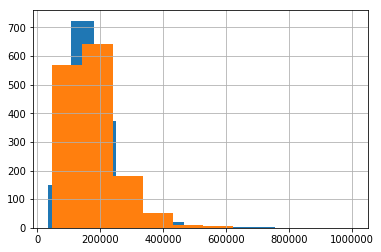

In [9]:
train_pre_stand['SalePrice'].hist()
submission['SalePrice'].hist()

In [10]:
ridge.coef_

array([ 2.23343927e-02,  7.28455501e-02,  1.28058410e-01,  8.42175821e-02,
        6.64048975e-02,  3.99858903e-02,  2.30850856e-02,  2.08354743e-02,
       -7.54031620e-03,  3.73924118e-02,  9.01255637e-03,  3.12055558e-02,
        1.34549874e-01, -7.55145129e-03, -2.64274376e-02,  3.66565650e-02,
        3.71005792e-02,  3.23411755e-02,  1.79622067e-02, -2.50257918e-03,
        4.06160551e-02,  4.75625588e-02,  2.62325937e-02,  8.55581058e-03,
        1.27491409e-02,  7.77085176e-03,  3.67467469e-03,  2.19568825e-02,
        1.85830775e-02, -1.02755443e-02, -3.13926632e-02, -3.30940392e-03,
       -1.26253842e-02, -7.32777670e-04,  9.27970722e-04,  1.26350776e-02,
       -2.69411195e-03, -6.40942253e-03, -1.19575870e-03, -1.95293965e-03,
       -3.02206648e-03,  0.00000000e+00, -2.26592382e-02, -4.04022362e-03,
       -5.07666033e-03,  3.41565121e-02,  1.48010280e-02,  5.01060082e-02,
        2.17792983e-02,  2.13609538e-02,  1.00300246e-03,  1.35900754e-02,
        6.68953068e-03, -